In [1]:
# Install required libraries if not already installed
!pip install pandas numpy tensorflow scikit-learn

# Optionally, install matplotlib for visualizations
!pip install matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/Reviews.csv')

# Check for null values and remove them
df.dropna(subset=['Text', 'Score'], inplace=True)

# Check the shape of the dataset
print(df.shape)

# Display the first few rows
df.head()



(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Convert the 'Score' column into a binary label (0: negative, 1: positive)
def sentiment_label(score):
    if score >= 4:
        return 1  # Positive
    else:
        return 0  # Negative

# Apply the function to the dataset
df['Sentiment'] = df['Score'].apply(sentiment_label)

# Check the distribution of sentiments
df['Sentiment'].value_counts()


,count
Sentiment,
1,443777
0,124677


In [4]:
# Tokenization: Convert text to sequences
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum length of the review sequences

# Create the tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Text'])

# Convert text to sequences
X = tokenizer.texts_to_sequences(df['Text'])

# Pad sequences to ensure consistent length
X = pad_sequences(X, maxlen=max_len)

# Encode the labels (0 for negative, 1 for positive)
y = df['Sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Build the LSTM model
model = Sequential()

# Embedding layer (input_dim is vocab size, output_dim is the size of the embedding vectors)
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 1689s 296ms/step - accuracy: 0.8657 - loss: 0.3239 - val_accuracy: 0.9142 - val_loss: 0.2155
Epoch 2/5
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 1565s 272ms/step - accuracy: 0.9242 - loss: 0.1964 - val_accuracy: 0.9302 - val_loss: 0.1806
Epoch 3/5
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 1604s 276ms/step - accuracy: 0.9394 - loss: 0.1581 - val_accuracy: 0.9309 - val_loss: 0.1789
Epoch 4/5
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 1534s 270ms/step - accuracy: 0.9507 - loss: 0.1312 - val_accuracy: 0.9360 - val_loss: 0.1759
Epoch 5/5
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 1585s 270ms/step - accuracy: 0.9579 - loss: 0.1126 - val_accuracy: 0.9368 - val_loss: 0.1828


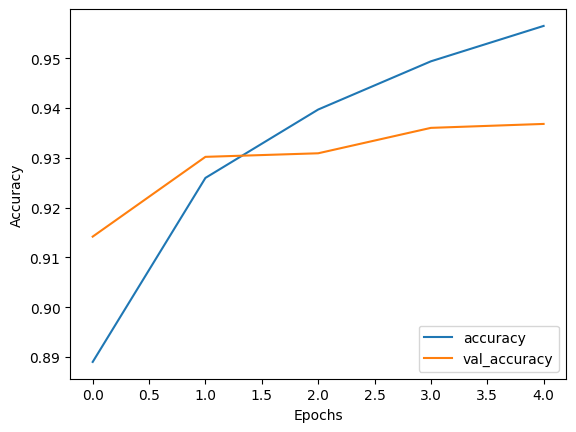

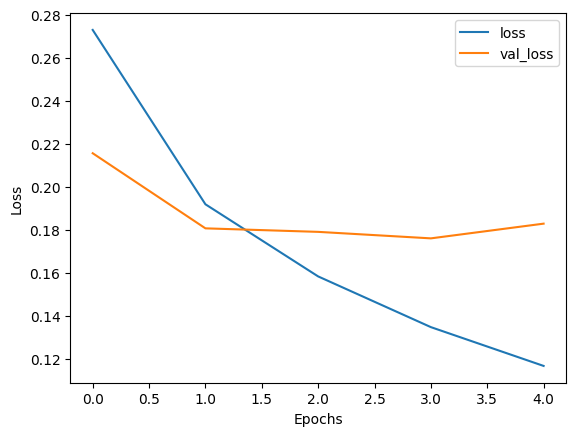

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [7]:
# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


3553/3553 ━━━━━━━━━━━━━━━━━━━━ 209s 59ms/step
Test Accuracy: 0.9372
Accuracy: 93.72%
Confusion Matrix:
 [[20189  4477]
 [ 2667 86358]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     24666
           1       0.95      0.97      0.96     89025

    accuracy                           0.94    113691
   macro avg       0.92      0.89      0.90    113691
weighted avg       0.94      0.94      0.94    113691



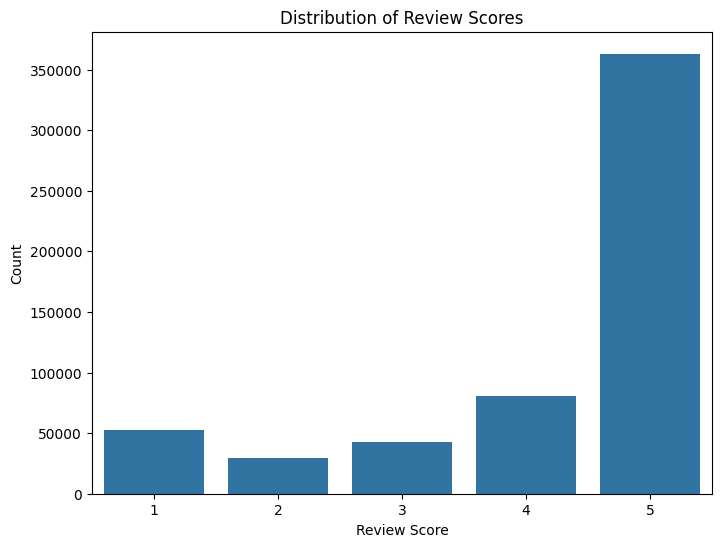

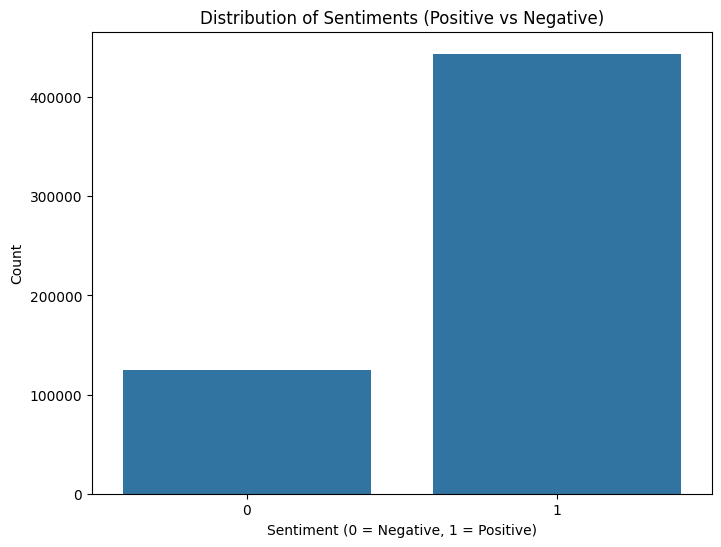

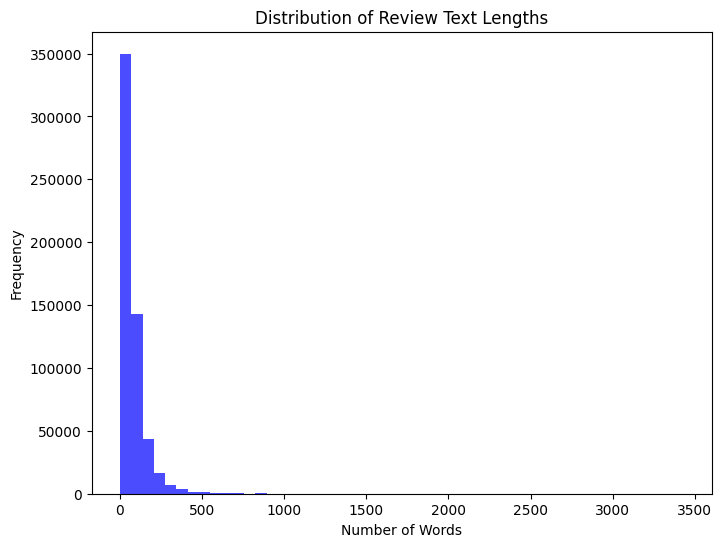

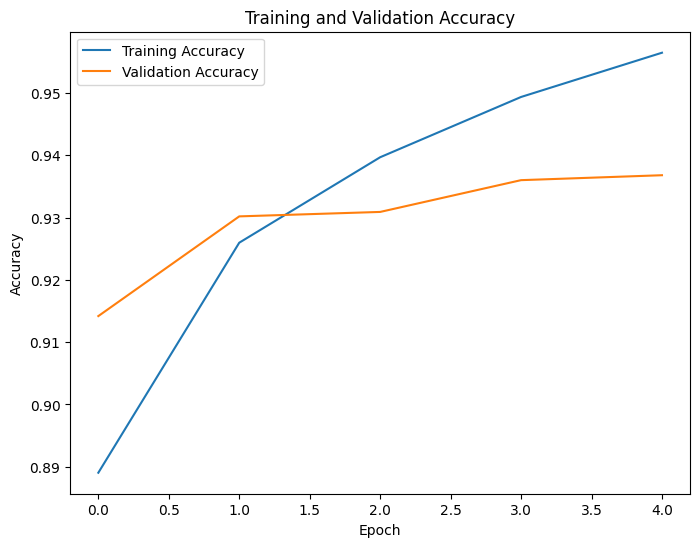

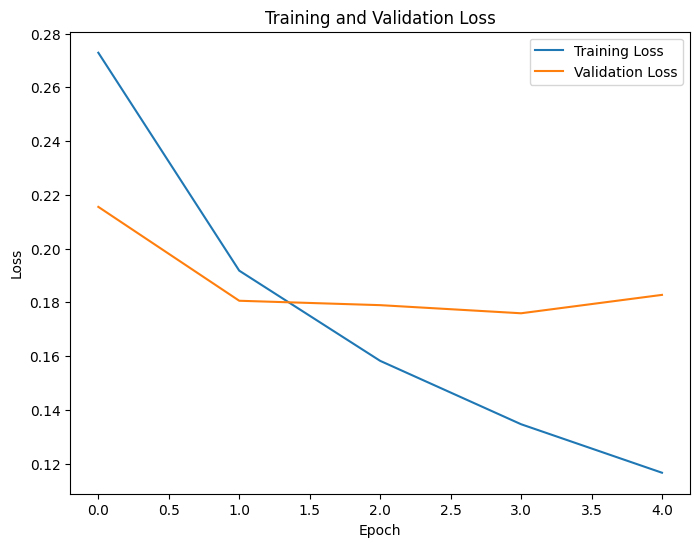

In [10]:
import seaborn as sns

# Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# Review text length distribution
df['Review_Length'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(df['Review_Length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Model training history (Accuracy and Loss)
# history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3553/3553 ━━━━━━━━━━━━━━━━━━━━ 211s 59ms/step - accuracy: 0.9365 - loss: 0.1852
Accuracy: 93.72%
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 205s 58ms/step
Classification Report:

              precision    recall  f1-score   support

    Negative       0.88      0.82      0.85     24666
    Positive       0.95      0.97      0.96     89025

    accuracy                           0.94    113691
   macro avg       0.92      0.89      0.90    113691
weighted avg       0.94      0.94      0.94    113691



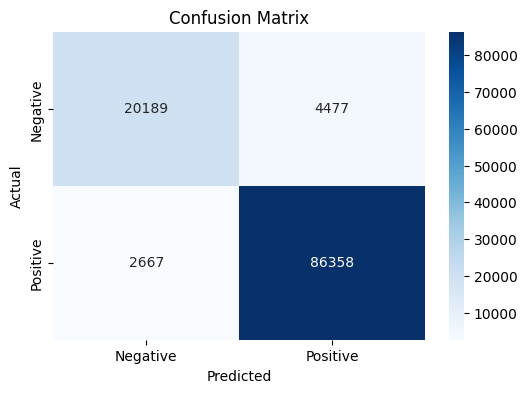

In [11]:
from sklearn.metrics import confusion_matrix

# Train the model
# history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predict sentiment on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 201s 56ms/step
Review: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Predicted Sentiment: Positive
Actual Sentiment: Positive

Review: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Predicted Sentiment: Positive
Actual Sentiment: Positive

Review: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story

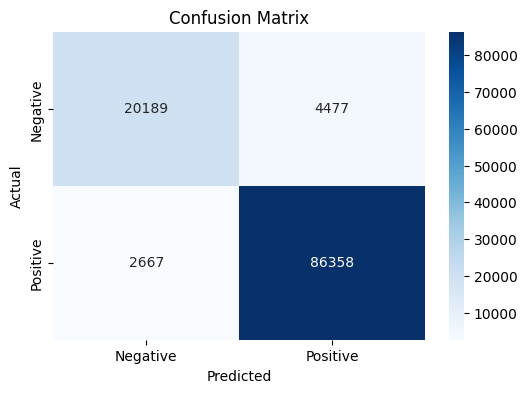

In [14]:
# Predict the sentiment for the test set
y_pred_probs = model.predict(X_test)  # Returns probabilities

# Convert probabilities to binary values (0 = Negative, 1 = Positive)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Display the first 10 predictions and the corresponding actual sentiments
for i in range(10):
    print(f"Review: {df['Text'].iloc[i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i][0] == 1 else 'Negative'}")
    print(f"Actual Sentiment: {'Positive' if y_test[i] == 1 else 'Negative'}\n")

# Evaluate accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Display classification report for precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix to show performance visually
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# New unseen reviews for testing (you can replace these with real reviews)
new_reviews = [
    "This product was absolutely amazing! Loved it.",
    "I hated this product, it was terrible.",
    "The quality is okay, not too bad but not great either.",
    "Really fast delivery but the product didn’t meet my expectations.",
    "Fantastic product, I will buy again!",
    "Not worth the price at all. Very disappointed."
]

# Preprocess the new reviews (tokenize and pad them just like in training)
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=max_len)

# Predict sentiment on new data
new_predictions_probs = model.predict(new_data)
new_predictions = (new_predictions_probs > 0.5).astype("int32")

# Print the results
for i, review in enumerate(new_reviews):
    predicted_sentiment = "Positive" if new_predictions[i][0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Review: This product was absolutely amazing! Loved it.
Predicted Sentiment: Positive
Prediction Probability: 0.98

Review: I hated this product, it was terrible.
Predicted Sentiment: Negative
Prediction Probability: 0.00

Review: The quality is okay, not too bad but not great either.
Predicted Sentiment: Negative
Prediction Probability: 0.04

Review: Really fast delivery but the product didn’t meet my expectations.
Predicted Sentiment: Positive
Prediction Probability: 0.91

Review: Fantastic product, I will buy again!
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: Not worth the price at all. Very disappointed.
Predicted Sentiment: Negative
Prediction Probability: 0.00



In [18]:
# Save the model
model.save('sentiment_analysis_lstm_model.h5')
